# Integrated Project

Project description
You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.
(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2017 sales based on data from 2016.)
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.
Instructions for completing the project
<br>



**Step 1** Open the data file and study the general information
File path:
/datasets/games.csv . Download dataset
<br>
**Step 2** Prepare the data

    Replace the column names (make them lowercase).
    Convert the data to the required types.
    Describe the columns where the data types have been changed and why.
    If necessary, decide how to deal with missing values:
        Explain why you filled in the missing values as you did or why you decided to leave them blank.
        Why do you think the values are missing? Give possible reasons.
        Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
    Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.
<br>

**Step 3** Analyze the data

    Look at how many games were released in different years. Is the data for every period significant?
    Look at how sales varied from platform to platform.
<br>
    Choose the platforms with the greatest total sales and build a distribution based on data for each year.
<br>
    Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
<br>
    Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
<br>
    Work only with the data that you've decided is relevant. Disregard the data for previous years.
<br>    
    Which platforms are leading in sales? 
<br>
    Which ones are growing or shrinking?
<br>    
    Select several potentially profitable platforms.
 <br>   
    Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
 <br>
    Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
<br>    
    Keeping your conclusions in mind, compare the sales of the same games on other platforms.
<br>    
    Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?
<br>

**Step 4** Create a user profile for each region
For each region (NA, EU, JP), determine:

    The top five platforms. Describe variations in their market shares from region to region.
    The top five genres. Explain the difference.
    Do ESRB ratings affect sales in individual regions?
<br>

**Step 5**Test the following hypotheses:
—Average user ratings of the Xbox One and PC platforms are the same.
—Average user ratings for the Action and Sports genres are different.
Set the alpha threshold value yourself.
Explain:
—How you formulated the null and alternative hypotheses
—What significance level you chose to test the hypotheses, and why
<br>


**Step 6**. Write a general conclusion
Format: Complete the task in the Jupyter Notebook. Insert the programming code in the code cells and text explanations in the markdown cells. Apply formatting and add headings.
<br>
How will my project be evaluated?
Read these project assessment criteria carefully before you get to work.
Here’s what project reviewers will be looking at when evaluating your project:
<br>
    How do you describe the problems you identify in the data?
    How do you prepare a dataset for analysis?
    How do you build distribution graphs and how do you explain them?
    How do you calculate standard deviation and variance?
    Do you formulate alternative and null hypotheses?
    What methods do you apply when testing them?
    Do you explain the results of your hypothesis tests?
    Do you follow the project structure and keep your code neat and comprehensible?
    Which conclusions do you reach?
    Did you leave clear, relevant comments at each step?

#### 1. Opening the data file and studying the general information

In [1]:
!pip install sidetable

In [2]:
import pandas as pd
import numpy as np
import datetime
import math
from functools import reduce
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

In [3]:
try:
    games = pd.read_csv('games.csv')
    

except:
    games = pd.read_csv('/datasets/games.csv')
    


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
games.stb.missing(style=True)

,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%


In [7]:
games_mis = games.isnull().sum().to_frame('missing_values')
games_mis['%'] = round(games.isnull().sum()/len(games),3)
games_mis.sort_values(by='%', ascending=False)

,missing_values,%
Critic_Score,8578,0.513
Rating,6766,0.405
User_Score,6701,0.401
Year_of_Release,269,0.016
Name,2,0.000
Platform,0,0.000
Genre,2,0.000
NA_sales,0,0.000
EU_sales,0,0.000
JP_sales,0,0.000


In [8]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [9]:
games.describe(include=object)

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [10]:
games.duplicated().sum()

0

We have missing values in **Critic_Score(51%)**, **User_Score(40%)** and **Rating(40%)**
<br>
Alsa there are **(1%)** missing values in **Year_of_relese** and **minor** missing data in  **name** and **genre**

Also we can cee that **top game** in the dataset is **Need for Speed: Most Wanted**	,**top consule** is **PS2**, **top genre** is **Action** and **most common ESRB rating** is **E**

#### 2. Preparing the data

 **Replacing the column names (make them lowercase)**

In [11]:

games= games.rename(columns=str.lower)

In [12]:
games.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


We decided not **to drop** the raws with missing values in 	**year_of_release**	becose there a lot of usefull information in tham.
<br>
We just filling missing years with **nulls**

In [13]:
games['year_of_release'] = games['year_of_release'].fillna(0)

In [14]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,    0., 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [15]:
games['year_of_release'] = games['year_of_release'].astype(int) 

Converting **years** from **float** to **int**

In [16]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [17]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


In [18]:
games['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000,    0, 1995,
       1991, 1981, 1987, 1980, 1983])

In [19]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [20]:
games["name"].fillna("No Name", inplace = True)

In [21]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [22]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


In [23]:
games[games['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,No Name,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,No Name,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [24]:
games["genre"].fillna("No Genre", inplace = True)

In [25]:
games[games['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [26]:
games = games[games.genre != 'No Genre']

We have checked that **No Genre** and **No Name** values are present in the same tho(0) raws, so we desided **to drop** tham from our dataset.

In [27]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB


Filling  the missing **critic_score** values with **nulls** and convertin them to **int**

In [28]:
games["critic_score"].fillna(0, inplace = True)
games['critic_score'] = games['critic_score'].astype(int)

games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int32  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(4), int32(2), object(5)
memory usage: 1.4+ MB


In [29]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**user_score** has **object** datatype becose of **tbd** values

In [30]:
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Filling **tbd** values with **nulls** and saving **user_score** as **float**

In [31]:
games['user_score'] = games['user_score'].replace('tbd', -1)

In [32]:

games['user_score'].fillna(0, inplace = True)
games['user_score'] = games['user_score'].astype(float)

games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int32  
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.4+ MB


In [33]:
games['user_score'].unique()

array([ 8. ,  0. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5, -1. ,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,
        4.9,  4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,
        4.4,  4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,
        2.5,  1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,
        3.8,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

Replasing missing values of **rating** with **Not Rated**

In [34]:
games["rating"].fillna("Not Rated", inplace = True)

In [35]:
games["rating"].unique()

array(['E', 'Not Rated', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

### [Entertainment Software Rating Board](https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board)
**'E'** - Everyone
<br>
**'M'** - Mature 17+
<br> 
**'T'** - Teen 
<br>
**'E10+'** - Everyone 10+ 
<br>
**'K-A'** - Kids to Adults: convert to 'E'
<br>
**'AO'** - Adults Only 18+
<br> 
**'EC'** - 	Early Childhood
<br>
**'RP'** - Rating Pending( not yet been assigned a final rating by the ESRB)

**'K-A'** This rating was used from 1994 to 1998 before it was replaced with the Everyone **(E)** rating

In [36]:
games['rating'] = games['rating'].replace('K-A', 'E')

In [37]:
games["rating"].unique()

array(['E', 'Not Rated', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [38]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int32  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.4+ MB


In [39]:
games.stb.missing(style=True)

,missing,total,percent
name,0,"16,713",0.00%
platform,0,"16,713",0.00%
year_of_release,0,"16,713",0.00%
genre,0,"16,713",0.00%
na_sales,0,"16,713",0.00%
eu_sales,0,"16,713",0.00%
jp_sales,0,"16,713",0.00%
other_sales,0,"16,713",0.00%
critic_score,0,"16,713",0.00%
user_score,0,"16,713",0.00%


In [40]:
games_mis = games.isnull().sum().to_frame('missing_values')
games_mis['%'] = round(games.isnull().sum()/len(games),3)
games_mis.sort_values(by='%', ascending=False)

,missing_values,%
name,0,0.0
platform,0,0.0
year_of_release,0,0.0
genre,0,0.0
na_sales,0,0.0
eu_sales,0,0.0
jp_sales,0,0.0
other_sales,0,0.0
critic_score,0,0.0
user_score,0,0.0


In [41]:
games.reset_index()
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,Not Rated
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,Not Rated
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0.0,Not Rated
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0.0,Not Rated


**Calculating the total sales (the sum of sales in all regions) for each game and puting these values in a separate column**

In [42]:
games['total_sales']=games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,Not Rated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,Not Rated,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,Not Rated,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.0,Not Rated,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,Not Rated,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0.0,Not Rated,0.01


In [43]:
games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
8026,Amplitude,PS2,2003,Misc,0.09,0.07,0.00,0.02,86,8.8,T,0.18
1786,Dance Dance Revolution Extreme 2,PS2,2005,Simulation,0.95,0.04,0.00,0.16,76,9.0,E10+,1.15
5701,Crash Nitro Kart,XB,2003,Racing,0.24,0.07,0.00,0.01,70,8.9,E,0.32
11705,Duke Nukem: Land of the Babes,PS,2000,Shooter,0.04,0.03,0.00,0.00,37,6.8,M,0.07
5529,Samurai Warriors 2: Xtreme Legends (JP sales),PS2,2007,Action,0.00,0.00,0.33,0.00,0,0.0,Not Rated,0.33
5352,UEFA Euro 2008 Austria-Switzerland,X360,2008,Sports,0.08,0.23,0.00,0.03,0,0.0,Not Rated,0.34
3587,Manhunt 2,PS2,2007,Action,0.27,0.21,0.00,0.07,67,7.8,M,0.55
11491,Man vs. Wild,PS3,2010,Action,0.07,0.00,0.00,0.01,0,0.0,Not Rated,0.08
14515,Shin Sangoku Musou Online: Kamishou Ranbu,PS3,2010,Action,0.00,0.00,0.03,0.00,0,0.0,Not Rated,0.03
10961,Dance on Broadway,PS3,2011,Misc,0.05,0.03,0.00,0.01,0,-1.0,E10+,0.09


In [44]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,Not Rated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,Not Rated,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0.0,Not Rated,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0.0,Not Rated,28.31


In [45]:
games.tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.0,63,5.8,Not Rated,0.01
16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.0,0,-1.0,T,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.0,0,0.0,Not Rated,0.01
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.0,0,0.0,Not Rated,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.0,0,0.0,Not Rated,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,0,0.0,Not Rated,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,0,0.0,Not Rated,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,0,0.0,Not Rated,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,0,0.0,Not Rated,0.01
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.0,0,0.0,Not Rated,0.01


In [46]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000
mean,1974.191348,0.263302,0.145045,0.077625,0.047343,33.578053,3.090714,0.533315
std,252.574959,0.813565,0.503359,0.308871,0.186742,35.818495,3.830138,1.548282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.000000,0.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


In [47]:
games.describe(include = ['object'])

,name,platform,genre,rating
count,16713,16713,16713,16713
unique,11559,31,12,8
top,Need for Speed: Most Wanted,PS2,Action,Not Rated
freq,12,2161,3369,6764


**Why do you think the values are missing? Give possible reasons.**


**Entertainment Software Rating Board "ESRB" was established only in 1994, so there no ratings for oldest games.**
<br>
https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board

Regarding the **user_score** and **critic_score**  we shoul understand that many  oldest games were relised in **"Pre Internet Era"** and  websites that aggregates reviews of users and critics **were founded only in 2000-s(for example: Metacritic was launched only in 2001)**
<br>
\https://en.wikipedia.org/wiki/Metacritic

####  3. Analyzing the data

**Looking at how many games were released in different years.**

**Games released by years.**

In [48]:
games_by_years = games[['year_of_release','name']].groupby(['year_of_release']).count()\
.sort_values(by='year_of_release').reset_index()
games_by_years

,year_of_release,name
0,0,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15


**Dropping** years there **0(null) games** were released

In [49]:
games_by_years=games_by_years[games_by_years['year_of_release']!=0]
games_by_years

,year_of_release,name
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15
10,1989,17


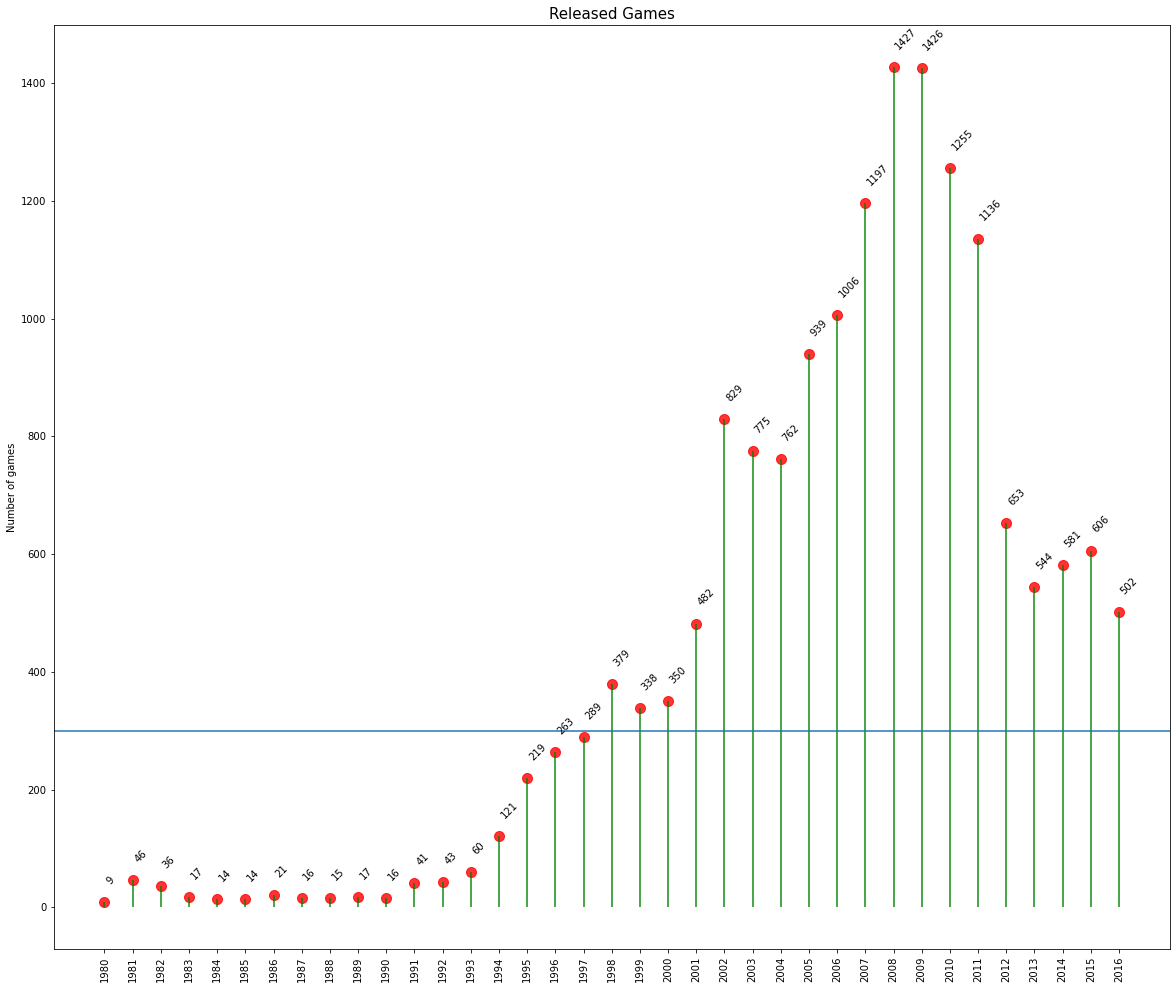

In [50]:

fig,ax=plt.subplots(figsize=(20,17))
ax.vlines(x=games_by_years.year_of_release, ymin=0, ymax=games_by_years.name, color='green', alpha=0.7, linewidth=2)
ax.scatter(x=games_by_years.year_of_release,y=games_by_years.name, s=100, color='red',alpha=0.8)

ax.set_title("Released Games", fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xticks(games_by_years.year_of_release)
ax.set_xticklabels(games_by_years.year_of_release,rotation=90)
ax.axhline(y=300)

for row in games_by_years.itertuples():
    ax.text(row.year_of_release, row.name+30,s=row.name,rotation=45)

**Is the data for every period significant?**

**We can cee that the  years  from 2007 to 2011 were wery prodactive years for gamedev indastry**

**To show  how sales varied from platform to platform we desided to use the Z-score method.**



### NA region platforms sales

In [51]:
na_sales=games[['platform','na_sales']].groupby(['platform']).sum().sort_values(by='na_sales').reset_index()
na_sales

,platform,na_sales
0,3DO,0.00
1,WS,0.00
2,TG16,0.00
3,GG,0.00
4,NG,0.00
5,PCFX,0.00
6,SAT,0.72
7,SCD,1.00
8,DC,5.43
9,PSV,12.58


In [52]:
na_sales['sales_z']=(na_sales['na_sales']-na_sales['na_sales'].mean())/na_sales['na_sales'].std()

In [53]:
na_sales

,platform,na_sales,sales_z
0,3DO,0.00,-0.802472
1,WS,0.00,-0.802472
2,TG16,0.00,-0.802472
3,GG,0.00,-0.802472
4,NG,0.00,-0.802472
5,PCFX,0.00,-0.802472
6,SAT,0.72,-0.798402
7,SCD,1.00,-0.796819
8,DC,5.43,-0.771776
9,PSV,12.58,-0.731357


In [54]:
na_sales['color']=['red' if x<0 else 'green' for x in na_sales['sales_z']]
na_sales

,platform,na_sales,sales_z,color
0,3DO,0.00,-0.802472,red
1,WS,0.00,-0.802472,red
2,TG16,0.00,-0.802472,red
3,GG,0.00,-0.802472,red
4,NG,0.00,-0.802472,red
5,PCFX,0.00,-0.802472,red
6,SAT,0.72,-0.798402,red
7,SCD,1.00,-0.796819,red
8,DC,5.43,-0.771776,red
9,PSV,12.58,-0.731357,red


Text(0, 0.5, 'Platforms')

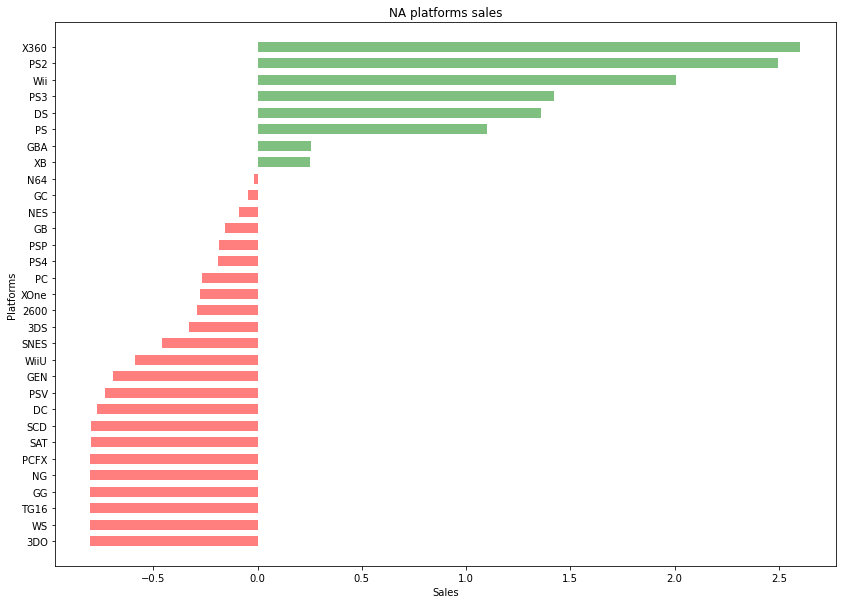

In [55]:
plt.figure(figsize=(14,10))
plt.hlines(y=na_sales.platform,xmax=na_sales.sales_z, xmin=0,color=na_sales.color, alpha=0.5, linewidth=10)
plt.title('NA platforms sales')
plt.xlabel('Sales')
plt.ylabel('Platforms')

We can cee that platforms  with  greatest total sales in **NA** region are:
<br>
XBox 360
<br>
Play Station 2
<br>
Wii
<br>
Play Station 3
<br>
Nintendo DS

### EU region platforms sales

In [56]:
eu_sales=games[['platform','eu_sales']].groupby(['platform']).sum().sort_values(by='eu_sales').reset_index()
eu_sales

,platform,eu_sales
0,3DO,0.00
1,WS,0.00
2,PCFX,0.00
3,TG16,0.00
4,NG,0.00
5,GG,0.00
6,SCD,0.36
7,SAT,0.54
8,DC,1.69
9,2600,5.47


In [57]:
eu_sales['sales_z']=(eu_sales['eu_sales']-eu_sales['eu_sales'].mean())/eu_sales['eu_sales'].std()

In [58]:
eu_sales


,platform,eu_sales,sales_z
0,3DO,0.00,-0.750577
1,WS,0.00,-0.750577
2,PCFX,0.00,-0.750577
3,TG16,0.00,-0.750577
4,NG,0.00,-0.750577
5,GG,0.00,-0.750577
6,SCD,0.36,-0.747122
7,SAT,0.54,-0.745394
8,DC,1.69,-0.734356
9,2600,5.47,-0.698074


In [59]:
eu_sales['color']=['red' if x<0 else 'green' for x in eu_sales['sales_z']]
eu_sales

,platform,eu_sales,sales_z,color
0,3DO,0.00,-0.750577,red
1,WS,0.00,-0.750577,red
2,PCFX,0.00,-0.750577,red
3,TG16,0.00,-0.750577,red
4,NG,0.00,-0.750577,red
5,GG,0.00,-0.750577,red
6,SCD,0.36,-0.747122,red
7,SAT,0.54,-0.745394,red
8,DC,1.69,-0.734356,red
9,2600,5.47,-0.698074,red


Text(0, 0.5, 'Platforms')

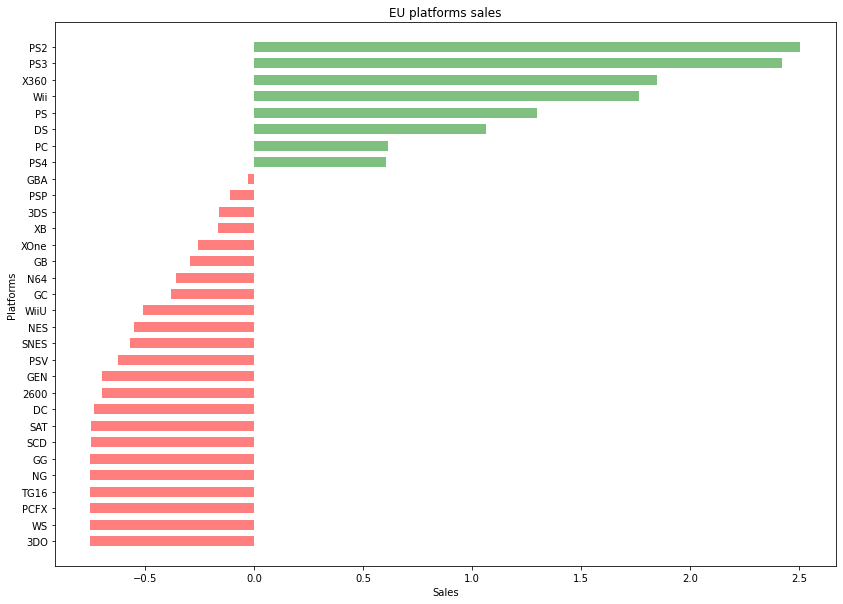

In [60]:
plt.figure(figsize=(14,10))
plt.hlines(y=eu_sales.platform,xmax=eu_sales.sales_z, xmin=0,color=eu_sales.color, alpha=0.5, linewidth=10)
plt.title('EU platforms sales')
plt.xlabel('Sales')
plt.ylabel('Platforms')

We can cee that platforms  with  greatest total sales in **EU** region are:
<br>
Play Station 2
<br>
Play Station 3
<br>
Xbox 360
<br>
Wii
<br>
Play Station1

### JP region platforms sales

In [61]:
jp_sales=games[['platform','jp_sales']].groupby(['platform']).sum().sort_values(by='jp_sales').reset_index()
jp_sales

,platform,jp_sales
0,2600,0.00
1,PCFX,0.03
2,GG,0.04
3,3DO,0.10
4,TG16,0.16
5,PC,0.17
6,XOne,0.34
7,SCD,0.45
8,XB,1.38
9,WS,1.42


In [62]:
jp_sales['sales_z']=(jp_sales['jp_sales']-jp_sales['jp_sales'].mean())/jp_sales['jp_sales'].std()
jp_sales

,platform,jp_sales,sales_z
0,2600,0.00,-0.813736
1,PCFX,0.03,-0.813152
2,GG,0.04,-0.812958
3,3DO,0.10,-0.811791
4,TG16,0.16,-0.810624
5,PC,0.17,-0.810430
6,XOne,0.34,-0.807124
7,SCD,0.45,-0.804986
8,XB,1.38,-0.786902
9,WS,1.42,-0.786125


In [63]:
jp_sales['color']=['red' if x<0 else 'green' for x in jp_sales['sales_z']]
jp_sales

,platform,jp_sales,sales_z,color
0,2600,0.00,-0.813736,red
1,PCFX,0.03,-0.813152,red
2,GG,0.04,-0.812958,red
3,3DO,0.10,-0.811791,red
4,TG16,0.16,-0.810624,red
5,PC,0.17,-0.810430,red
6,XOne,0.34,-0.807124,red
7,SCD,0.45,-0.804986,red
8,XB,1.38,-0.786902,red
9,WS,1.42,-0.786125,red


Text(0, 0.5, 'Platforms')

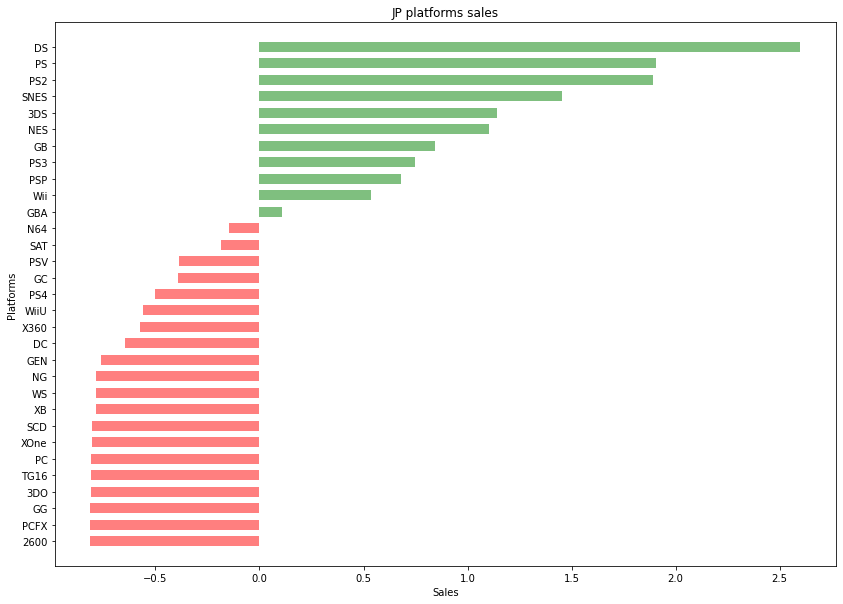

In [64]:
plt.figure(figsize=(14,10))
plt.hlines(y=jp_sales.platform,xmax=jp_sales.sales_z, xmin=0,color=jp_sales.color, alpha=0.5, linewidth=10)
plt.title('JP platforms sales')
plt.xlabel('Sales')
plt.ylabel('Platforms')

We can cee that platforms  with  greatest total sales in **JP** region are:
<br>
Nintendo Ds
<br>
Play Station 1
<br>
Play Station 2
<br>
SNES
<br>
Nintendo 3DS

### Other regions platforms sales

In [65]:
other_sales = games[['platform','other_sales']].groupby(['platform']).sum().sort_values(by='other_sales').reset_index()
other_sales

,platform,other_sales
0,3DO,0.00
1,TG16,0.00
2,PCFX,0.00
3,WS,0.00
4,GG,0.00
5,NG,0.00
6,SCD,0.05
7,SAT,0.07
8,DC,0.27
9,GEN,0.89


In [66]:
other_sales['sales_z']=(other_sales['other_sales']-other_sales['other_sales'].mean())/other_sales['other_sales'].std()
other_sales

,platform,other_sales,sales_z
0,3DO,0.00,-0.572031
1,TG16,0.00,-0.572031
2,PCFX,0.00,-0.572031
3,WS,0.00,-0.572031
4,GG,0.00,-0.572031
5,NG,0.00,-0.572031
6,SCD,0.05,-0.570911
7,SAT,0.07,-0.570462
8,DC,0.27,-0.565980
9,GEN,0.89,-0.552085


In [67]:
other_sales['color']=['red' if x<0 else 'green' for x in other_sales['sales_z']]
other_sales

,platform,other_sales,sales_z,color
0,3DO,0.00,-0.572031,red
1,TG16,0.00,-0.572031,red
2,PCFX,0.00,-0.572031,red
3,WS,0.00,-0.572031,red
4,GG,0.00,-0.572031,red
5,NG,0.00,-0.572031,red
6,SCD,0.05,-0.570911,red
7,SAT,0.07,-0.570462,red
8,DC,0.27,-0.565980,red
9,GEN,0.89,-0.552085,red


Text(0, 0.5, 'Platforms')

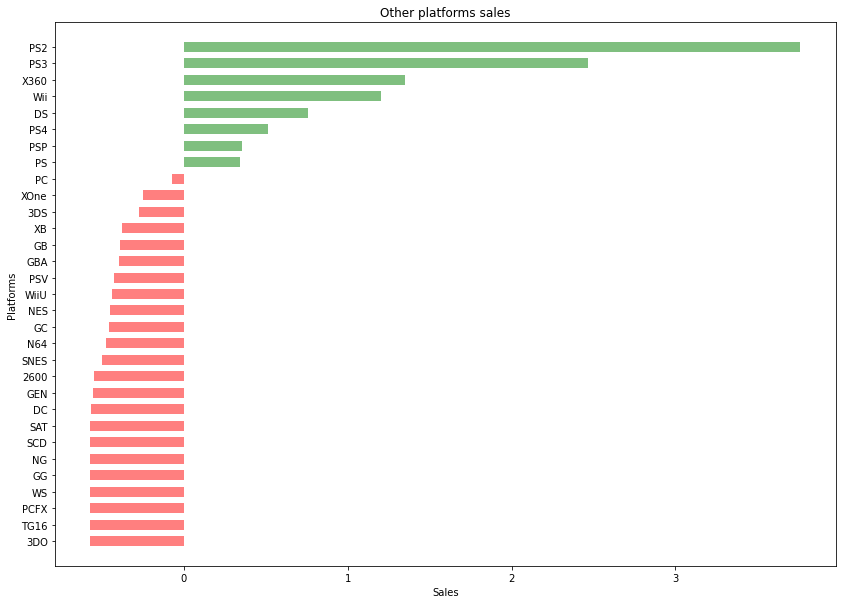

In [68]:
plt.figure(figsize=(14,10))
plt.hlines(y=other_sales.platform,xmax=other_sales.sales_z, xmin=0,color=other_sales.color, alpha=0.5, linewidth=10)
plt.title('Other platforms sales')
plt.xlabel('Sales')
plt.ylabel('Platforms')

We can cee that platforms  with  greatest total sales in **Other** region are:
<br>
Play Station 2
<br>
Play Station 3
<br>
Xbox 360
<br>
Wii
<br>
Nintendo DS

For purpose of our **prognosis** we desided to use data **from year 2005** there the **Seventh generation** of consoles was released

**Seventh generation (2005–2017)**
<br>
Xbox 360
<br>
PlayStation 3
<br>
Wii
<br>
https://en.wikipedia.org/wiki/Home_video_game_console_generations#Seventh_generation_(2005%E2%80%932017)

In [69]:
games_new=games[games.year_of_release>=2005]
games_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,0,0.0,Not Rated,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,Not Rated,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.0,Not Rated,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,Not Rated,0.01


In [70]:
plat_lifetime=games_new.groupby(['platform'])['year_of_release'].agg(['min','max'])
plat_lifetime.reset_index()

,platform,min,max
0,3DS,2011,2016
1,DC,2007,2008
2,DS,2005,2013
3,GBA,2005,2007
4,GC,2005,2007
5,PC,2005,2016
6,PS2,2005,2011
7,PS3,2006,2016
8,PS4,2013,2016
9,PSP,2005,2015


In [71]:
plat_lifetime['max']-plat_lifetime['min']

platform
3DS      5
DC       1
DS       8
GBA      2
GC       2
PC      11
PS2      6
PS3     10
PS4      3
PSP     10
PSV      5
Wii     10
WiiU     4
X360    11
XB       3
XOne     3
dtype: int32

In [72]:
plat_lifetime['age']=plat_lifetime['max']-plat_lifetime['min']

In [73]:
plat_lifetime.sort_values(by='age',ascending=False)

,min,max,age
platform,,,
PC,2005,2016,11
X360,2005,2016,11
PS3,2006,2016,10
PSP,2005,2015,10
Wii,2006,2016,10
DS,2005,2013,8
PS2,2005,2011,6
3DS,2011,2016,5
PSV,2011,2016,5


In [74]:
plat_lifetime['age'].mean()


5.875

In [75]:
plat_lifetime.sort_values(by='age',ascending=False)


,min,max,age
platform,,,
PC,2005,2016,11
X360,2005,2016,11
PS3,2006,2016,10
PSP,2005,2015,10
Wii,2006,2016,10
DS,2005,2013,8
PS2,2005,2011,6
3DS,2011,2016,5
PSV,2011,2016,5


We can cee that max platform lifetime is **11** years , in averege its take **6** years
<br>
Xbox 360 - 11 years
<br>
PS 3 - 10 years
<br>
PSP - 10 Years

We desided to use **shift** to show which platforms are leading in sales.
Which ones are growing or shrinking

In [76]:
leading_pl=pd.pivot_table(games_new,index='year_of_release',columns='platform',values='total_sales',aggfunc='sum',fill_value=0)
leading_pl

platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2005,0.00,0.00,130.14,33.86,27.62,4.37,160.66,0.00,0.00,43.84,0.00,0.00,0.00,8.25,49.08,0.00
2006,0.00,0.00,119.81,5.28,11.26,2.85,103.42,20.96,0.00,55.32,0.00,137.15,0.00,51.62,10.04,0.00
2007,0.00,0.02,146.94,3.40,0.27,9.28,75.99,73.19,0.00,46.93,0.00,152.77,0.00,95.41,0.55,0.00
2008,0.00,0.04,145.31,0.00,0.00,12.42,53.90,118.52,0.00,34.55,0.00,171.32,0.00,135.26,0.18,0.00
2009,0.00,0.00,119.54,0.00,0.00,16.91,26.40,130.93,0.00,37.78,0.00,206.97,0.00,120.29,0.00,0.00
2010,0.00,0.00,85.02,0.00,0.00,24.28,5.64,142.17,0.00,35.04,0.00,127.95,0.00,170.03,0.00,0.00
2011,63.20,0.00,26.18,0.00,0.00,35.03,0.45,156.78,0.00,17.82,4.63,59.65,0.00,143.84,0.00,0.00
2012,51.36,0.00,11.01,0.00,0.00,23.22,0.00,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00,0.00
2013,56.57,0.00,1.54,0.00,0.00,12.38,0.00,113.25,25.99,3.14,10.59,8.59,21.65,88.58,0.00,18.96


In [77]:
leading_pl.shift(+1)

platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,0.00,0.00,130.14,33.86,27.62,4.37,160.66,0.00,0.00,43.84,0.00,0.00,0.00,8.25,49.08,0.00
2007,0.00,0.00,119.81,5.28,11.26,2.85,103.42,20.96,0.00,55.32,0.00,137.15,0.00,51.62,10.04,0.00
2008,0.00,0.02,146.94,3.40,0.27,9.28,75.99,73.19,0.00,46.93,0.00,152.77,0.00,95.41,0.55,0.00
2009,0.00,0.04,145.31,0.00,0.00,12.42,53.90,118.52,0.00,34.55,0.00,171.32,0.00,135.26,0.18,0.00
2010,0.00,0.00,119.54,0.00,0.00,16.91,26.40,130.93,0.00,37.78,0.00,206.97,0.00,120.29,0.00,0.00
2011,0.00,0.00,85.02,0.00,0.00,24.28,5.64,142.17,0.00,35.04,0.00,127.95,0.00,170.03,0.00,0.00
2012,63.20,0.00,26.18,0.00,0.00,35.03,0.45,156.78,0.00,17.82,4.63,59.65,0.00,143.84,0.00,0.00
2013,51.36,0.00,11.01,0.00,0.00,23.22,0.00,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00,0.00


In [78]:
leading_pl-leading_pl.shift(+1)

platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,0.00,0.00,-10.33,-28.58,-16.36,-1.52,-57.24,20.96,0.00,11.48,0.00,137.15,0.00,43.37,-39.04,0.00
2007,0.00,0.02,27.13,-1.88,-10.99,6.43,-27.43,52.23,0.00,-8.39,0.00,15.62,0.00,43.79,-9.49,0.00
2008,0.00,0.02,-1.63,-3.40,-0.27,3.14,-22.09,45.33,0.00,-12.38,0.00,18.55,0.00,39.85,-0.37,0.00
2009,0.00,-0.04,-25.77,0.00,0.00,4.49,-27.50,12.41,0.00,3.23,0.00,35.65,0.00,-14.97,-0.18,0.00
2010,0.00,0.00,-34.52,0.00,0.00,7.37,-20.76,11.24,0.00,-2.74,0.00,-79.02,0.00,49.74,0.00,0.00
2011,63.20,0.00,-58.84,0.00,0.00,10.75,-5.19,14.61,0.00,-17.22,4.63,-68.30,0.00,-26.19,0.00,0.00
2012,-11.84,0.00,-15.17,0.00,0.00,-11.81,-0.45,-49.42,0.00,-10.13,11.56,-37.94,17.56,-44.10,0.00,0.00
2013,5.21,0.00,-9.47,0.00,0.00,-10.84,0.00,5.89,25.99,-4.55,-5.60,-13.12,4.09,-11.16,0.00,18.96


In [79]:
dynamics=(leading_pl-leading_pl.shift(+1)).T
dynamics

year_of_release,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,
3DS,NaN,0.00,0.00,0.00,0.00,0.00,63.20,-11.84,5.21,-12.81,-15.98,-12.64
DC,NaN,0.00,0.02,0.02,-0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DS,NaN,-10.33,27.13,-1.63,-25.77,-34.52,-58.84,-15.17,-9.47,-1.54,0.00,0.00
GBA,NaN,-28.58,-1.88,-3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,NaN,-16.36,-10.99,-0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PC,NaN,-1.52,6.43,3.14,4.49,7.37,10.75,-11.81,-10.84,0.90,-4.76,-3.27
PS2,NaN,-57.24,-27.43,-22.09,-27.50,-20.76,-5.19,-0.45,0.00,0.00,0.00,0.00
PS3,NaN,20.96,52.23,45.33,12.41,11.24,14.61,-49.42,5.89,-65.49,-30.94,-13.22
PS4,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.99,74.01,18.90,-49.65


Plotting the **heatmap**

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

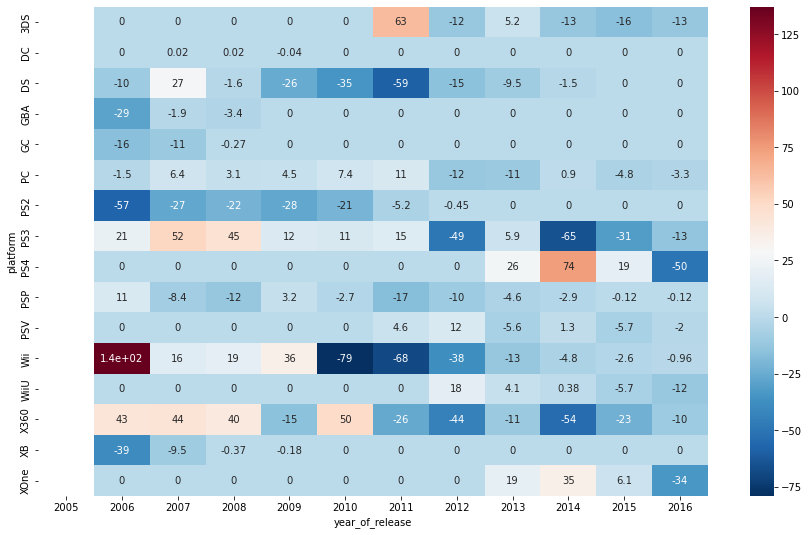

In [80]:
plt.figure(figsize=(15,9))
sns.heatmap(dynamics, cmap='RdBu_r',annot=True)

**Building a box plot for the global sales of all games, broken down by platform.**



In [81]:
grouped=games_new.groupby(['platform','name'])['total_sales'].mean().reset_index()
grouped


,platform,name,total_sales
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Frozen: Olaf's Quest,0.59
3,3DS,Haikyu!! Cross Team Match!,0.04
4,3DS,12-Sai. Honto no Kimochi,0.07
...,...,...,...
11264,XOne,XCOM 2,0.04
11265,XOne,ZombiU,0.01
11266,XOne,Zombie Army Trilogy,0.11
11267,XOne,Zoo Tycoon (2013),0.36


In [82]:
order=grouped.groupby(['platform'])['total_sales'].mean().reset_index().sort_values(by='total_sales')['platform']
order

1       DC
10     PSV
5       PC
3      GBA
9      PSP
14      XB
4       GC
2       DS
6      PS2
0      3DS
12    WiiU
15    XOne
11     Wii
7      PS3
13    X360
8      PS4
Name: platform, dtype: object

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

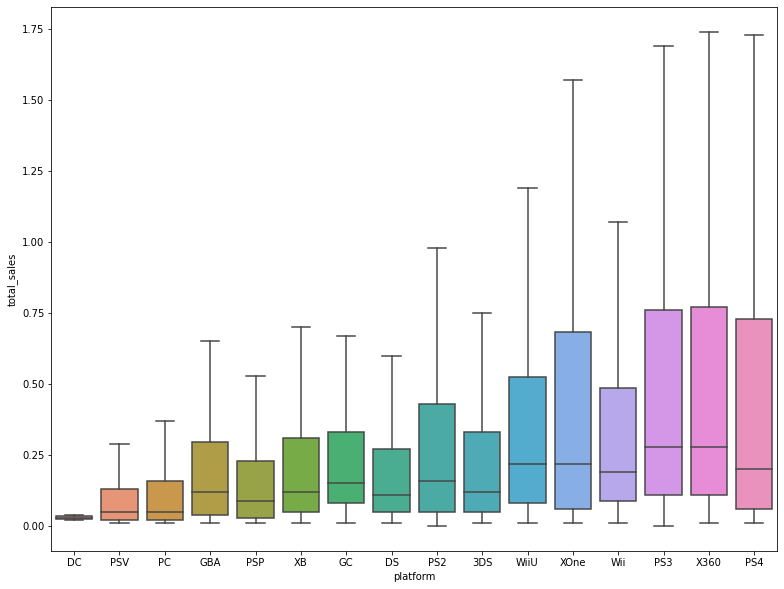

In [83]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform',y='total_sales',data=grouped,order=order,showfliers = False)

Most profitable platforms by averege sales are:
<br> 
**Ps4, X360, PS3, XOne and Wii U**

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

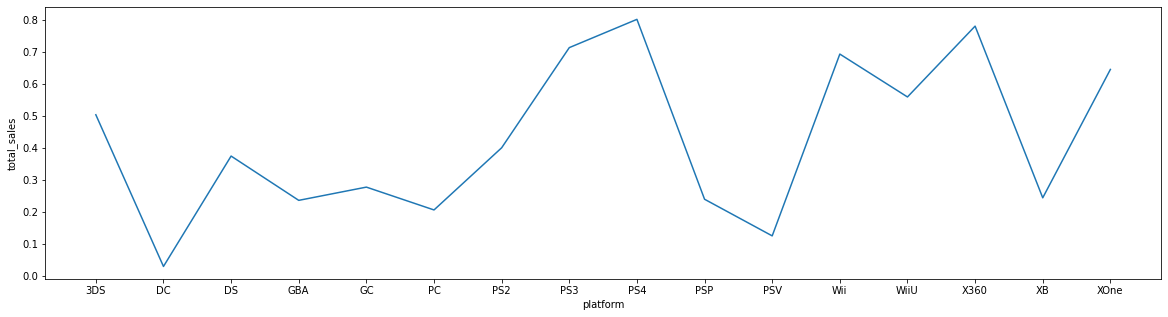

In [84]:

pl_sales = (games_new.pivot_table(index='platform', values='total_sales',aggfunc='mean'))
plt.figure(figsize=(20,5))
sns.lineplot(data=pl_sales, x="platform", y="total_sales",markers=True)

<AxesSubplot:title={'center':'PS3 Sales'}, xlabel='year_of_release', ylabel='total_sales'>

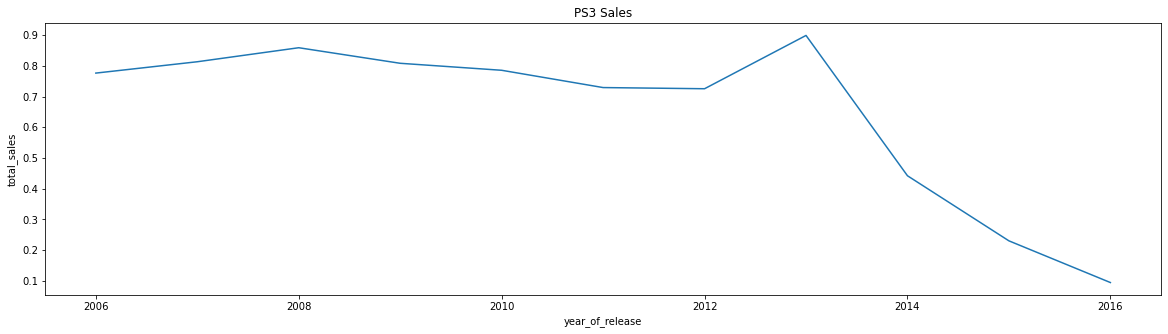

In [85]:
df_ps3 = games_new.query('platform=="PS3"')
ps3_sales = (df_ps3.pivot_table(index='year_of_release', values='total_sales',aggfunc='mean'))
plt.figure(figsize=(20,5))
plt.title('PS3 Sales')
sns.lineplot(data=ps3_sales, x="year_of_release", y="total_sales",markers=True)


PS3 there are top sales in 2013 and frome theere it goes down

<AxesSubplot:title={'center':'Wii Sales'}, xlabel='year_of_release', ylabel='total_sales'>

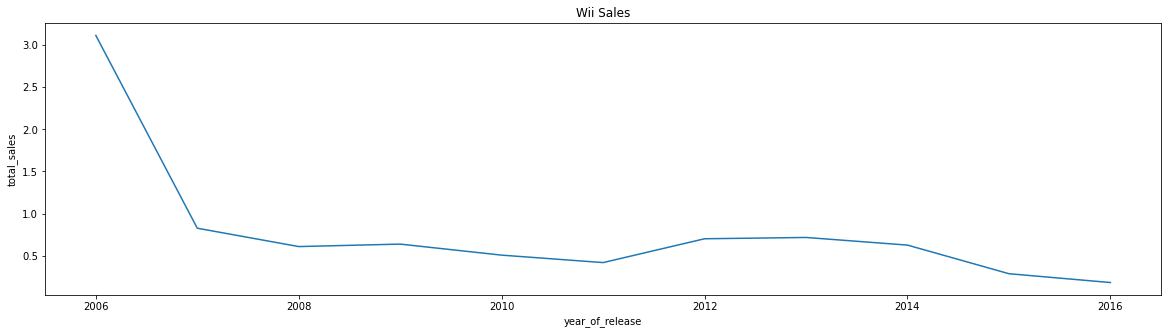

In [86]:
df_wii = games_new.query('platform=="Wii"')
wii_sales = (df_wii.pivot_table(index='year_of_release', values='total_sales',aggfunc='mean'))
plt.figure(figsize=(20,5))
plt.title('Wii Sales')
sns.lineplot(data=wii_sales, x="year_of_release", y="total_sales",markers=True)


 Wii was stable from 2012  to 2014 wtan goes down to

<AxesSubplot:title={'center':'PS4 Sales'}, xlabel='year_of_release', ylabel='total_sales'>

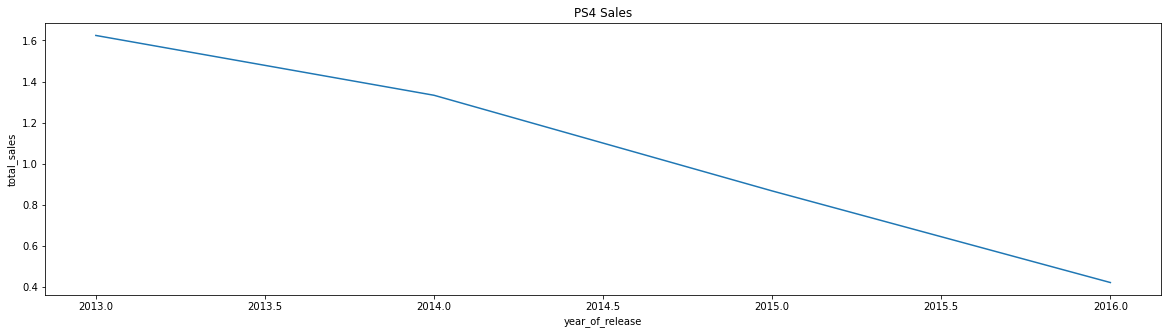

In [87]:
df_ps4 = games_new.query('platform=="PS4"')
ps4_sales = (df_ps4.pivot_table(index='year_of_release', values='total_sales',aggfunc='mean'))
plt.figure(figsize=(20,5))
plt.title('PS4 Sales')
sns.lineplot(data=ps4_sales, x="year_of_release", y="total_sales",markers=True)


<AxesSubplot:title={'center':'XOne Sales'}, xlabel='year_of_release', ylabel='total_sales'>

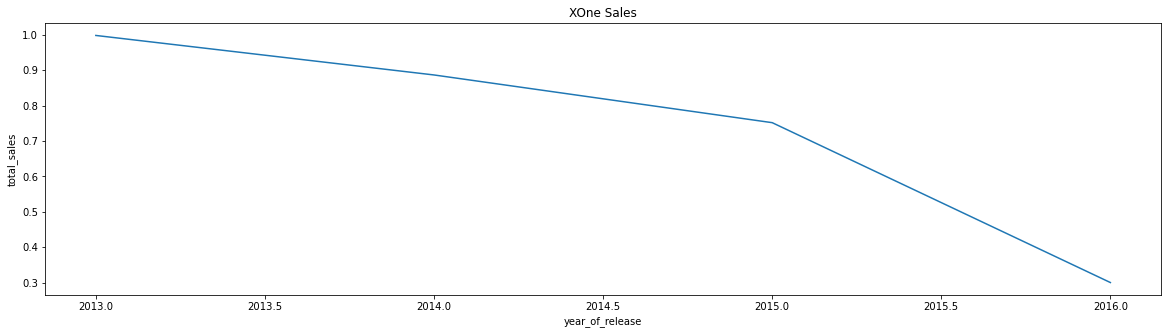

In [88]:
df_xone = games_new.query('platform=="XOne"')
xone_sales = (df_xone.pivot_table(index='year_of_release', values='total_sales',aggfunc='mean'))
plt.figure(figsize=(20,5))
plt.title('XOne Sales')
sns.lineplot(data=xone_sales, x="year_of_release", y="total_sales",markers=True)


<AxesSubplot:title={'center':'X360 Sales'}, xlabel='year_of_release', ylabel='total_sales'>

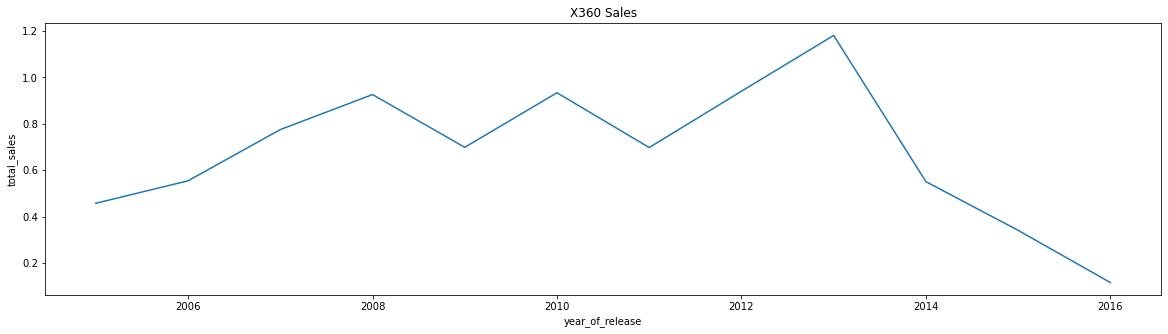

In [89]:
df_x360 = games_new.query('platform=="X360"')
x360_sales = (df_x360.pivot_table(index='year_of_release', values='total_sales',aggfunc='mean'))
plt.figure(figsize=(20,5))
plt.title('X360 Sales')
sns.lineplot(data=x360_sales, x="year_of_release", y="total_sales",markers=True)


In [90]:
games_sales_2016 = games_new.query('year_of_release==2016' )

<AxesSubplot:title={'center':'2016 Sales'}, xlabel='platform', ylabel='total_sales'>

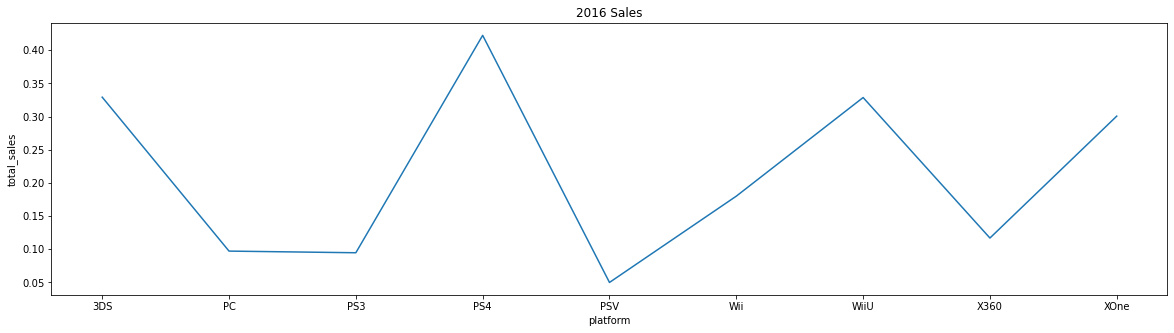

In [91]:
games_2016=(games_sales_2016.pivot_table(index='platform', values='total_sales',aggfunc='mean'))
plt.figure(figsize=(20,5))
plt.title('2016 Sales')
sns.lineplot(data=games_2016, x="platform", y="total_sales",markers=True)   

**Find platforms that used to be popular but now have zero sales.**


In [92]:
platforms = games_new['platform'].unique()

In [93]:
actual_platforms = games_sales_2016['platform'].unique()

In [94]:
zero_sales = [x for x in platforms if x not in actual_platforms ]
zero_sales

['DS', 'PSP', 'PS2', 'GBA', 'XB', 'GC', 'DC']

In [95]:
games_zero_sales = games_new.query('platform==@zero_sales' )
games_zero=(games_zero_sales.pivot_table(index='platform', values='total_sales',aggfunc='mean'))

<AxesSubplot:title={'center':'Old Platforms with Zero Sales '}, xlabel='platform', ylabel='total_sales'>

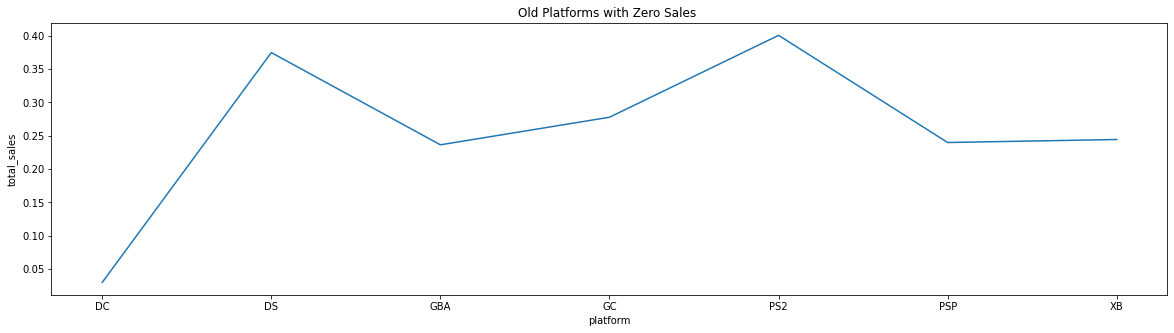

In [96]:
plt.figure(figsize=(20,5))
plt.title('Old Platforms with Zero Sales ')
sns.lineplot(data=games_zero, x="platform", y="total_sales",markers=True)   

**Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.**

In [97]:
ps4_data = games_new.query('platform == "PS4" and user_score != -1')


In [98]:
ps4_games = ps4_data['name'].unique()

In [99]:
sales_ps4 = ps4_data.pivot_table(index='total_sales', values=['critic_score', 'user_score'])


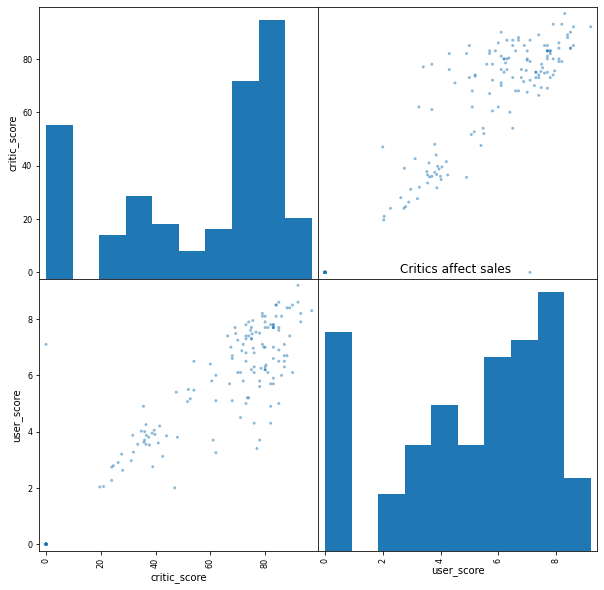

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.245388,-0.204430,-0.054207,-0.230761,-0.122681,-0.047099,-0.230911
na_sales,-0.245388,1.000000,0.784706,0.470920,0.944086,0.215400,0.102542,0.927934
eu_sales,-0.204430,0.784706,1.000000,0.462449,0.944525,0.219996,0.104017,0.958028
jp_sales,-0.054207,0.470920,0.462449,1.000000,0.494335,0.005449,-0.039787,0.525067
other_sales,-0.230761,0.944086,0.944525,0.494335,1.000000,0.227783,0.107514,0.998046
critic_score,-0.122681,0.215400,0.219996,0.005449,0.227783,1.000000,0.908579,0.225314
user_score,-0.047099,0.102542,0.104017,-0.039787,0.107514,0.908579,1.000000,0.104938
total_sales,-0.230911,0.927934,0.958028,0.525067,0.998046,0.225314,0.104938,1.000000


In [100]:
pd.plotting.scatter_matrix(sales_ps4,  figsize =(10,10))
plt.title("Critics affect sales ")
plt.show()
ps4_data.corr()


We can cee that **critic_score** has only **(21%)** influence on the **na_sales**, **(22%)** on the **eu_sales** and **other_sales** and  **only(5%)** on the **jp_sales**
<br>
**user_score** has  only **(10%)** influence on the **na_sales**, **(10%)** on the **eu_sales** and **other_sales** and  no influence  on the **jp_sales** at all.

**Play Station 4 Games Sales**

Text(0, 0.5, 'Sales')

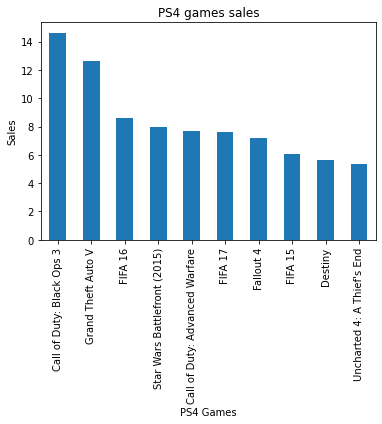

In [101]:
sales_by_game_ps4 = ps4_data.groupby('name').total_sales.sum()

sales_by_game_ps4.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('PS4 games sales')
plt.xlabel('PS4 Games')
plt.ylabel('Sales')

In [102]:
sales_by_game_ps4.sort_values(ascending=False).head(10)

name
Call of Duty: Black Ops 3         14.63
Grand Theft Auto V                12.62
FIFA 16                            8.58
Star Wars Battlefront (2015)       7.98
Call of Duty: Advanced Warfare     7.66
FIFA 17                            7.60
Fallout 4                          7.17
FIFA 15                            6.08
Destiny                            5.64
Uncharted 4: A Thief's End         5.39
Name: total_sales, dtype: float64

### Other platforms game sales

In [103]:
other_patforms = games_new.query('platform != "PS4" & name in @ps4_games ')

Text(0, 0.5, 'Sales')

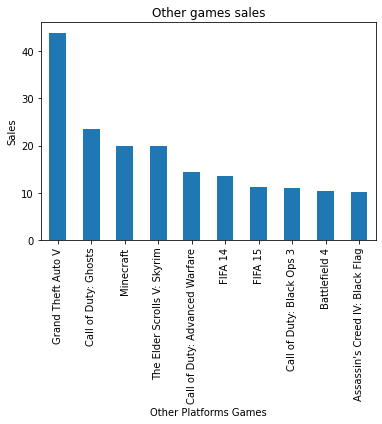

In [104]:
sales_by_game_other = other_patforms.groupby('name').total_sales.sum()
sales_by_game_other.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Other games sales')
plt.xlabel('Other Platforms Games')
plt.ylabel('Sales')

In [105]:
sales_by_game_other.sort_values(ascending=False).head(10)

name
Grand Theft Auto V                 43.96
Call of Duty: Ghosts               23.56
Minecraft                          19.84
The Elder Scrolls V: Skyrim        19.82
Call of Duty: Advanced Warfare     14.31
FIFA 14                            13.45
FIFA 15                            11.29
Call of Duty: Black Ops 3          11.04
Battlefield 4                      10.36
Assassin's Creed IV: Black Flag    10.20
Name: total_sales, dtype: float64

In [106]:
gta5_game = games_new.query('name == "Grand Theft Auto V"')

In [107]:
gta5_game.sort_values(by= 'total_sales',ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96,7.9,M,1.17


In [108]:
cod_mw3 = games_new.query('name == "Call of Duty: Modern Warfare 3"')
cod_mw3.sort_values(by= 'total_sales',ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88,3.2,M,13.33
1040,Call of Duty: Modern Warfare 3,PC,2011,Shooter,0.41,0.98,0.00,0.32,78,2.5,M,1.71
2500,Call of Duty: Modern Warfare 3,Wii,2011,Shooter,0.55,0.20,0.00,0.08,70,1.8,M,0.83


In [109]:
fifa16 = games_new.query('name == "FIFA 16"')
fifa16.sort_values(by= 'total_sales',ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
417,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84,4.4,E,3.25
552,FIFA 16,PS3,2015,Sports,0.41,1.84,0.05,0.40,0,3.2,E,2.70
1182,FIFA 16,X360,2015,Sports,0.57,0.88,0.00,0.12,0,2.9,E,1.57
7575,FIFA 16,PC,2015,Sports,0.06,0.13,0.00,0.01,81,4.4,E,0.20


### Descovering leading genres:

In [110]:
games_genre = games_new['genre'].unique()

In [111]:
games_genre

array(['Sports', 'Racing', 'Platform', 'Misc', 'Simulation', 'Action',
       'Role-Playing', 'Puzzle', 'Shooter', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [112]:

games_genre_sales=games_new.pivot_table(index='genre', values='total_sales',aggfunc='sum')

<AxesSubplot:xlabel='genre'>

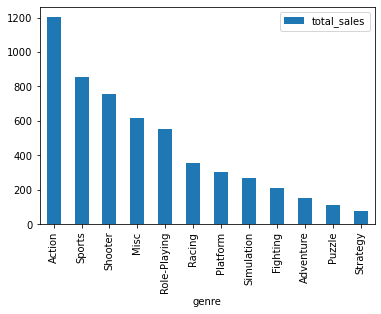

In [113]:
games_genre_sales.sort_values(by='total_sales', ascending=False).plot(kind='bar')

In [114]:
games_genre_sales.sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,1202.04
Sports,853.34
Shooter,758.56
Misc,615.83
Role-Playing,550.78
Racing,355.03
Platform,303.06
Simulation,269.62
Fighting,208.07


<AxesSubplot:title={'center':'Action Games Sales'}, xlabel='platform', ylabel='total_sales'>

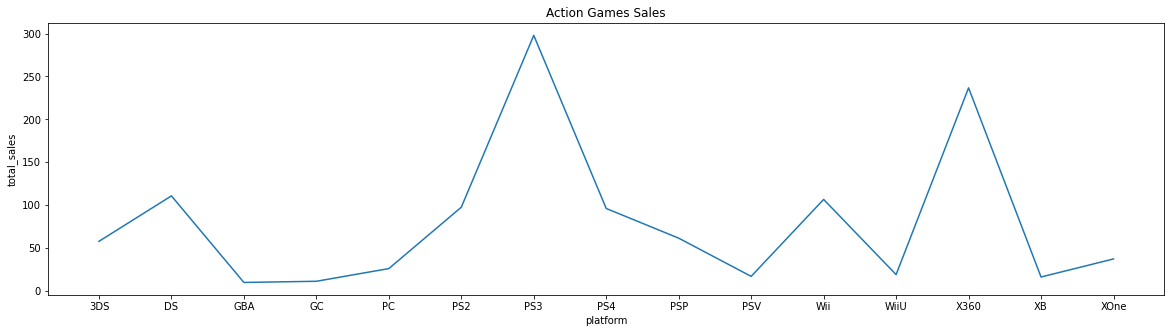

In [115]:
action_games = games_new.query('genre=="Action"')
action_games_sales = (action_games.pivot_table(index='platform', values='total_sales',aggfunc='sum'))
plt.figure(figsize=(20,5))
plt.title('Action Games Sales')
sns.lineplot(data=action_games_sales, x="platform", y="total_sales",markers=True)


<AxesSubplot:title={'center':'Adventure Games Sales'}, xlabel='platform', ylabel='total_sales'>

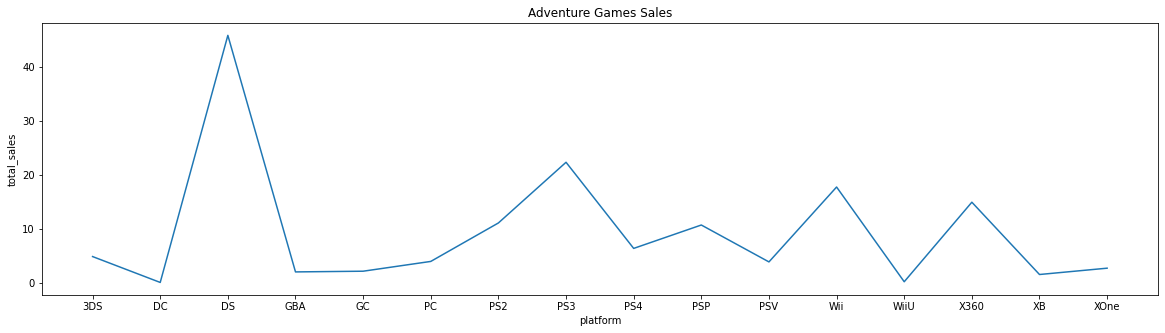

In [116]:
adventure_games = games_new.query('genre=="Adventure"')
adventure_games_sales = (adventure_games.pivot_table(index='platform', values='total_sales',aggfunc='sum'))
plt.figure(figsize=(20,5))
plt.title('Adventure Games Sales')
sns.lineplot(data=adventure_games_sales, x="platform", y="total_sales",markers=True)


 #### 4. Create a user profile for each region For each region (NA, EU, JP), determine:


### [Entertainment Software Rating Board](https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board)
**'E'** - Everyone
<br>
**'M'** - Mature 17+
<br> 
**'T'** - Teen 
<br>
**'E10+'** - Everyone 10+ 
<br>
**'K-A'** - Kids to Adults: convert to 'E'
<br>
**'AO'** - Adults Only 18+
<br> 
**'EC'** - 	Early Childhood
<br>
**'RP'** - Rating Pending( not yet been assigned a final rating by the ESRB)

### NA

In [117]:
games_rated = games_new.query('rating!="Not Rated"')


rating
E       873.10
M       607.34
T       479.08
E10+    343.02
EC        1.53
Name: na_sales, dtype: float64

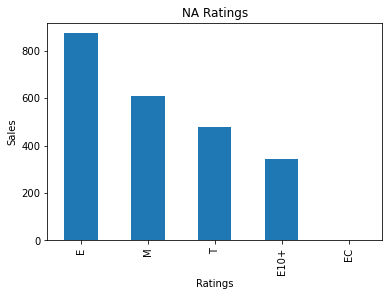

In [118]:
na_ratings_top=games_rated.groupby(['rating'])['na_sales'].sum().sort_values(ascending=False).head()
na_ratings_top.plot(kind='bar')
plt.title('NA Ratings')
plt.xlabel('Ratings')
plt.ylabel('Sales')

na_ratings_top



The top five platforms. Describe variations in their market shares from region to region.
The top five genres. Explain the difference.
Do ESRB ratings affect sales in individual regions?

Text(0.5, 1.0, 'NA Ratings')

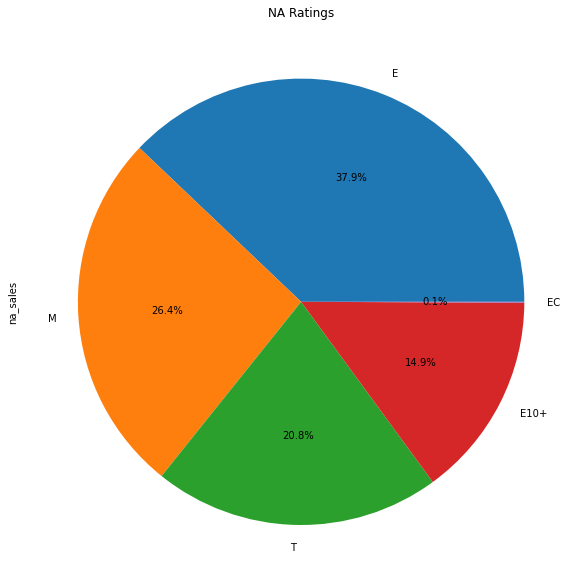

In [119]:
na_ratings_top.plot(kind='pie', figsize= (10,15), autopct= '%1.1f%%')
plt.title('NA Ratings')

platform
X360    0.483555
Wii     0.378593
XOne    0.377004
PS3     0.298721
PS4     0.277398
Name: na_sales, dtype: float64

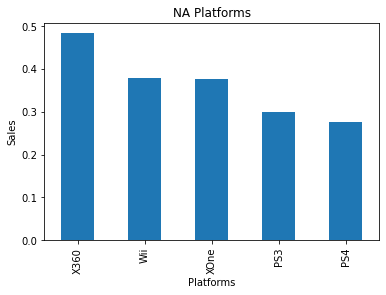

In [120]:
na_platforms_top =games_new.groupby(['platform'])['na_sales'].mean().sort_values(ascending=False).head()
na_platforms_top.plot(kind='bar')
plt.title('NA Platforms')
plt.xlabel('Platforms')
plt.ylabel('Sales')
na_platforms_top

Text(0.5, 1.0, 'NA Platforms')

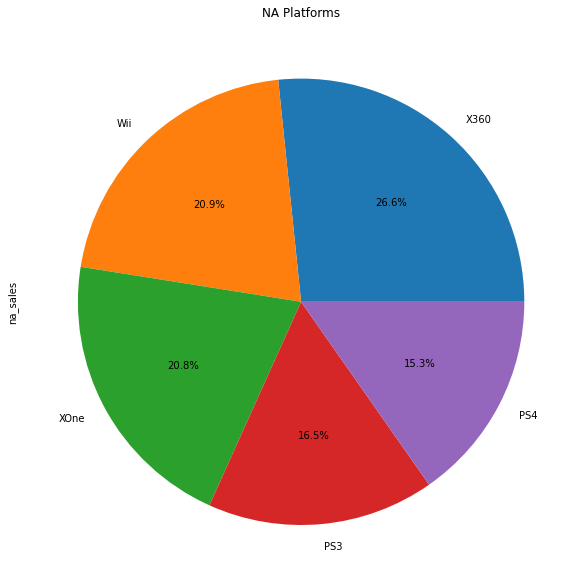

In [121]:
na_platforms_top.plot(kind='pie', figsize= (10,15), autopct= '%1.1f%%')
plt.title('NA Platforms')

genre
Action          580.04
Sports          432.70
Shooter         400.96
Misc            311.82
Role-Playing    211.85
Name: na_sales, dtype: float64

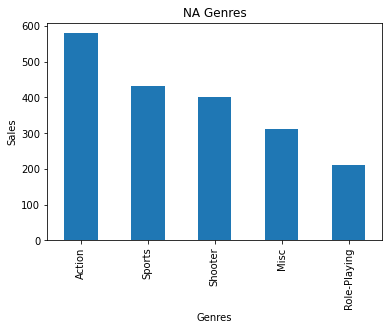

In [122]:
na_genres_top=games_new.groupby(['genre'])['na_sales'].sum().sort_values(ascending=False).head()
na_genres_top.plot(kind='bar')
plt.title('NA Genres')
plt.xlabel('Genres')
plt.ylabel('Sales')
na_genres_top 

Text(0.5, 1.0, 'NA Genres')

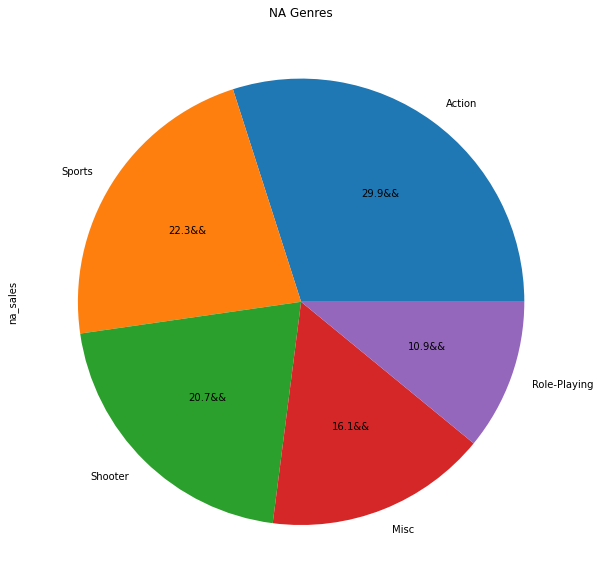

In [123]:
na_genres_top.plot(kind='pie', figsize= (10,15), autopct= '%1.1f&&')
plt.title('NA Genres')

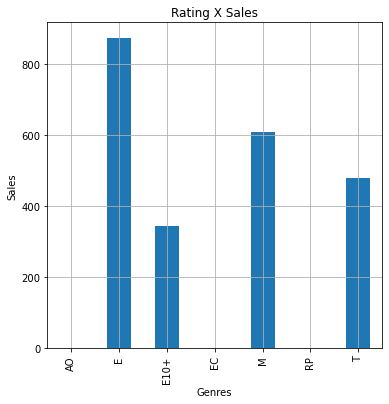

In [124]:
na_ratinga_influence = games_rated.groupby(['rating'])['na_sales'].agg('sum')
na_ratinga_influence.plot(kind ='bar', grid = True, figsize= (6,6))
plt.title('Rating X Sales')
plt.xlabel('Genres')
plt.ylabel('Sales')
plt.show()

### EU

rating
E       508.71
M       414.11
T       258.17
E10+    181.92
AO        0.61
Name: eu_sales, dtype: float64

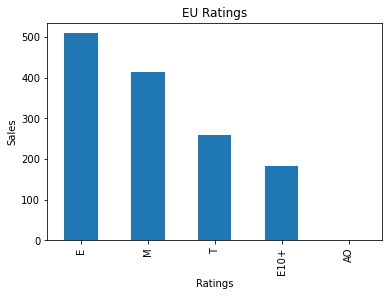

In [125]:

eu_rating_top=games_rated.groupby(['rating'])['eu_sales'].sum().sort_values(ascending=False).head()
eu_rating_top.plot(kind='bar')
plt.title('EU Ratings')
plt.xlabel('Ratings')
plt.ylabel('Sales')

eu_rating_top

<AxesSubplot:ylabel='eu_sales'>

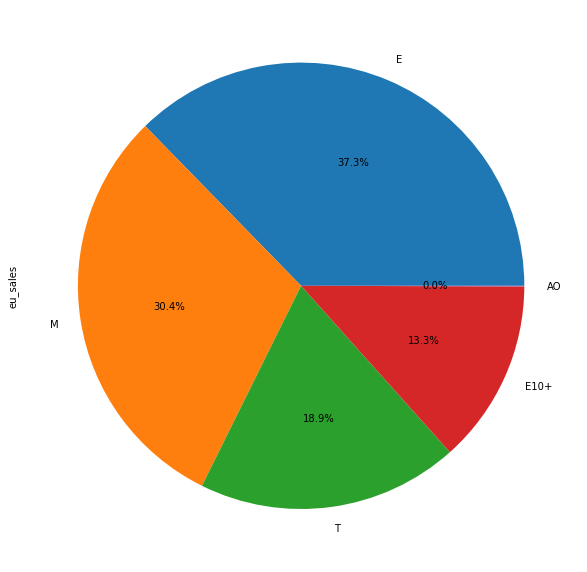

In [126]:
eu_rating_top.plot(kind='pie', figsize= (10,15), autopct= '%1.1f%%')

platform
PS4     0.359923
PS3     0.250544
X360    0.217792
XOne    0.208866
Wii     0.200871
Name: eu_sales, dtype: float64

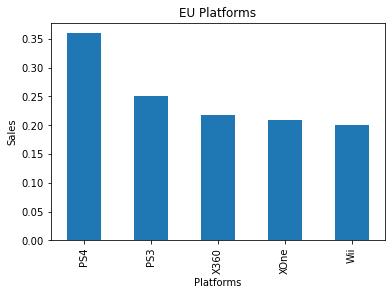

In [127]:
eu_platforms_top =games_new.groupby(['platform'])['eu_sales'].mean().sort_values(ascending=False).head()
eu_platforms_top.plot(kind='bar')
plt.title('EU Platforms')
plt.xlabel('Platforms')
plt.ylabel('Sales')
eu_platforms_top

Text(0.5, 1.0, 'EU Platforms')

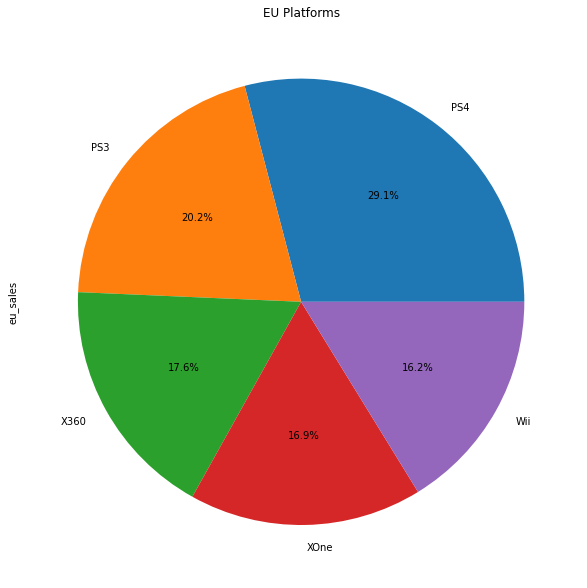

In [128]:
eu_platforms_top.plot(kind='pie', figsize= (10,15), autopct= '%1.1f%%')
plt.title('EU Platforms')

genre
Action          580.04
Sports          432.70
Shooter         400.96
Misc            311.82
Role-Playing    211.85
Name: na_sales, dtype: float64

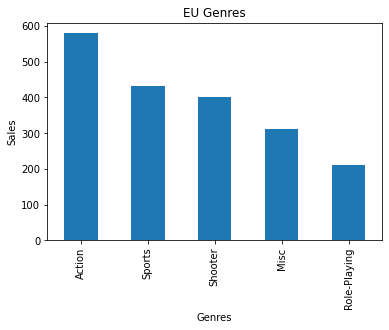

In [129]:
eu_genres_top=games_new.groupby(['genre'])['na_sales'].sum().sort_values(ascending=False).head()
eu_genres_top.plot(kind='bar')
plt.title('EU Genres')
plt.xlabel('Genres')
plt.ylabel('Sales')
eu_genres_top 

Text(0.5, 1.0, 'EU Genres')

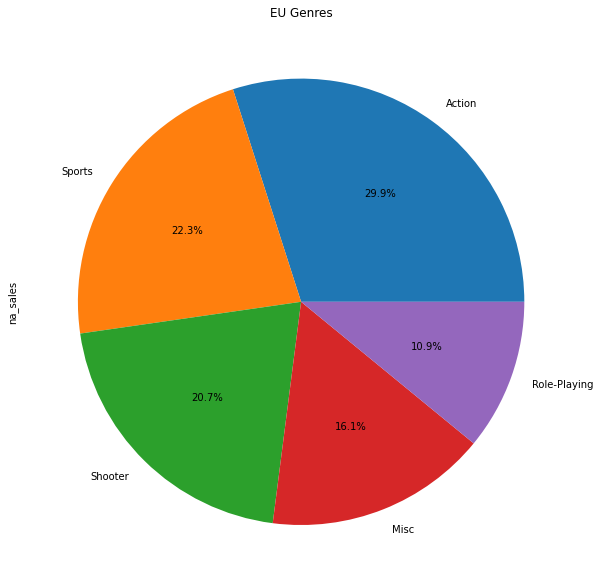

In [130]:
eu_genres_top.plot(kind='pie', figsize= (10,15), autopct= '%1.1f%%')
plt.title('EU Genres')

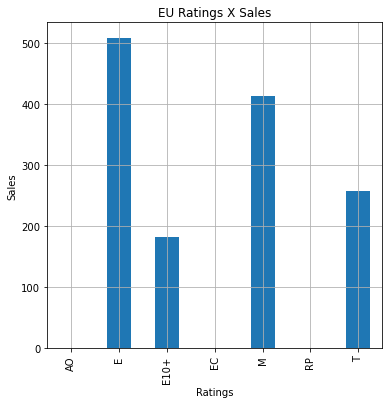

In [131]:
eu_ratinga_influence = games_rated.groupby(['rating'])['eu_sales'].agg('sum')
eu_ratinga_influence.plot(kind ='bar', grid = True, figsize= (6,6))
plt.title('EU Ratings X Sales')
plt.xlabel('Ratings')
plt.ylabel('Sales')
plt.show()

### JP

rating
E       147.33
T        91.32
M        46.23
E10+     39.05
AO        0.00
Name: jp_sales, dtype: float64

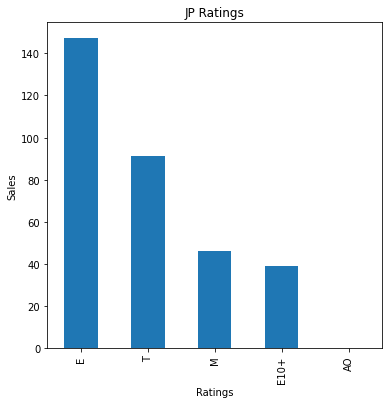

In [132]:
jp_rating_top=games_rated.groupby(['rating'])['jp_sales'].sum().sort_values(ascending=False).head()
jp_rating_top.plot(kind='bar', figsize= (6,6))
plt.title('JP Ratings')
plt.xlabel('Ratings')
plt.ylabel('Sales')
jp_rating_top

Text(0.5, 1.0, 'JP Ratings')

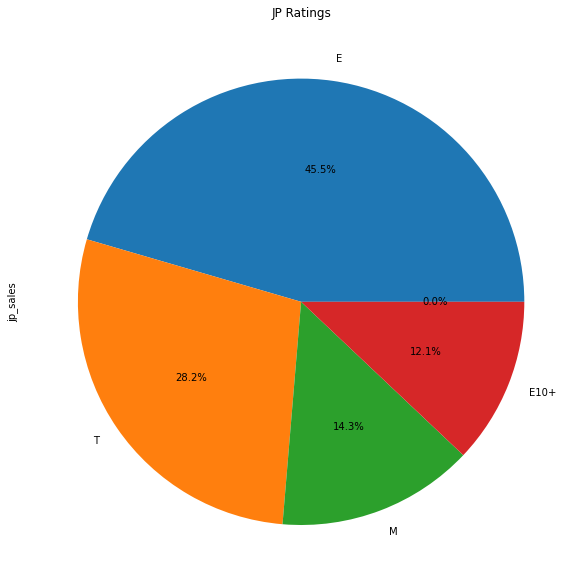

In [133]:
jp_rating_top.plot(kind='pie', figsize= (10,15), autopct= '%1.1f%%')
plt.title('JP Ratings')

platform
DS     171.35
3DS    100.62
PS3     79.41
PSP     73.85
Wii     68.28
Name: jp_sales, dtype: float64

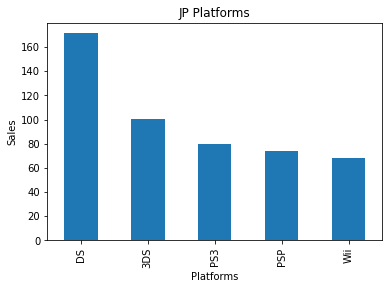

In [134]:
jp_platforms_top =games_new.groupby(['platform'])['jp_sales'].sum().sort_values(ascending=False).head()
jp_platforms_top.plot(kind='bar')
plt.title('JP Platforms')
plt.xlabel('Platforms')
plt.ylabel('Sales')
jp_platforms_top

Text(0.5, 1.0, 'JP Platforms')

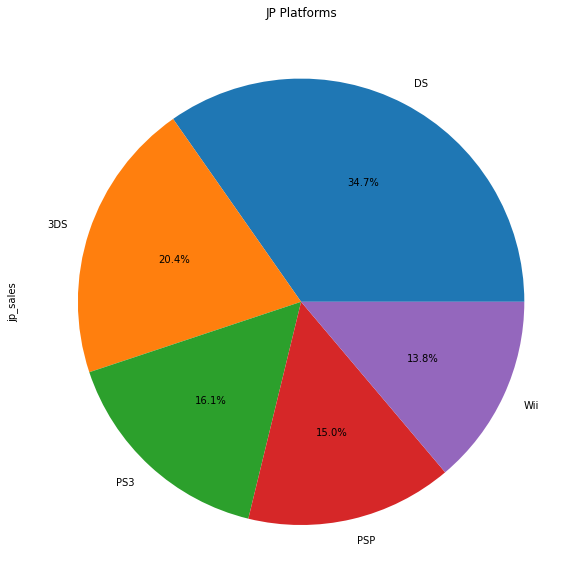

In [135]:
jp_platforms_top.plot(kind='pie', figsize= (10,15), autopct= '%1.1f%%')
plt.title('JP Platforms')

genre
Role-Playing    179.60
Action          108.39
Misc             72.49
Sports           52.51
Platform         36.32
Name: jp_sales, dtype: float64

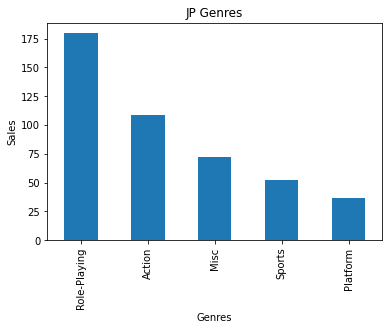

In [136]:
jp_genres_top=games_new.groupby(['genre'])['jp_sales'].sum().sort_values(ascending=False).head()
jp_genres_top.plot(kind='bar')
plt.title('JP Genres')
plt.xlabel('Genres')
plt.ylabel('Sales')
jp_genres_top 

Text(0.5, 1.0, 'JP Genres')

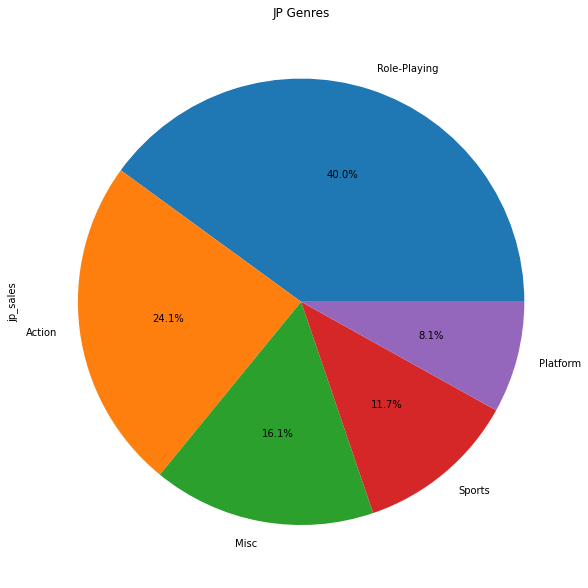

In [137]:
jp_genres_top.plot(kind='pie', figsize= (10,15), autopct= '%1.1f%%')
plt.title('JP Genres')

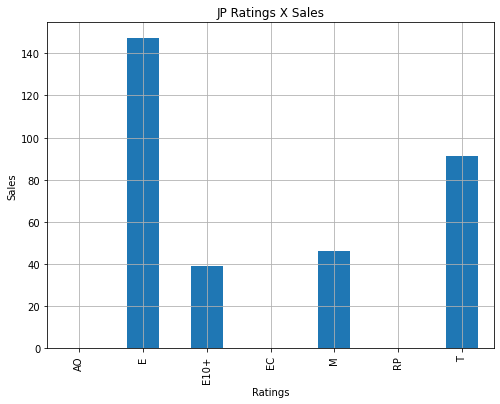

In [138]:
jp_rating_influence = games_rated.groupby(['rating'])['jp_sales'].agg('sum')
jp_rating_influence.plot(kind ='bar', grid = True, figsize= (8,6))
plt.title('JP Ratings X Sales')
plt.xlabel('Ratings')
plt.ylabel('Sales')
plt.show()

### Top Platforms

Using **groupby()** method we can get list of **top 5** platforms in each region
<br>
Using piechart we can cee platforms market shares are different fro region to region
<br>
In **NA**  :
<br>
**X360**    595.74 million dollars sales with **29.1%** share of the market
<br>
**Wii**     486.87 million dollars sales with **23.8%** share of the market
<br>
**PS3**     390.13 million dollars sales with **19.1%** share of the market
<br>
**DS**      371.98 million dollars sales with **18.2%** share of the market 
<br>
**PS2**     200.49 million dollars sales with **9.8%** share of the market

In **EU**  :
<br>
**PS3**    327.21 million dollars sales with **27.7%** share of the market
<br>
**X360**     268.32 million dollars sales with **22.8%** share of the market
<br>
**Wii**     390.13 million dollars sales with **21.9%** share of the market
<br>
**DS**      371.98 million dollars sales with **15.6%** share of the market 
<br>
**PS4**     200.49 million dollars sales with **12%** share of the market

In **JP**  :
<br>
**DS**    171.35 million dollars sales with **34.7%** share of the market
<br>
**3DS**     100.62 million dollars sales with **20.4%** share of the market
<br>
**PS3**     79.41 million dollars sales with **16.1%** share of the market
<br>
**PSP**      73.85 million dollars sales with **15%** share of the market 
<br>
**Wii**     68.28million dollars sales with **13.8%** share of the market

**We can cee that Japa market is vary different from other markets by leading platforms(Nintendo consoles are leading in Japan). But PS3 and Wii are in leaders in all the regions**

### Top Genres

In **NA**  :
<br>
Action          580.04   million dollars sales
<br>
Sports          432.70   million dollars sales
<br>
Shooter         400.96   million dollars sales
<br>
Misc            311.82   million dollars sales
<br>
Role-Playing    211.85   million dollars sales

In **EU**  :
<br>
Action     372.58 million dollars sales
<br>
Sports     265.61 million dollars sales
<br>
Shooter    248.07 million dollars sales
<br>
Misc       167.09 million dollars sales
<br>
Racing     129.05 million dollars sales

In **JP**  :
<br>
Role-Playing    179.60 million dollars sales
<br>
Action          108.39 million dollars sales
<br>
Misc             72.49 million dollars sales
<br>
Sports           52.51 million dollars sales
<br>
Platform         36.32 million dollars sales
    

**Also by geners if in other region Action Games is the leading genre, in Japan Role Playing is leading**

### Top Rating

In **NA**  :
<br>
E       873.10 million dollars sales
<br>
M       607.34 million dollars sales
<br>
T       479.08 million dollars sales
<br>
E10+    343.02 million dollars sales
<br>
EC        1.53 million dollars sales

In **EU**  :
<br>
E       508.71  million dollars sales
<br>
M       414.11  million dollars sales
<br>
T       258.17  million dollars sales
<br>
E10+    181.92  million dollars sales
<br>
AO        0.61  million dollars sales

In **JP**  :
<br>
E       147.33 million dollars sales
<br>
T        91.32 million dollars sales
<br>
M        46.23 million dollars sales
<br>
E10+     39.05 million dollars sales
<br>
AO        0.00 million dollars sales

**We can cee that rating AO( Adults Only 18+) has minor influence on sales in NA and UE markets but in Japan it hase no influence at all**

### 5. Test the hypotheses

#### 4. Testing the hypotheses H0 and H1

**Null hypothesis:**

1.Average user ratings of the **Xbox One** and **PC** platforms are **the same**.
<br>
2.Average user ratings for the **Action** and **Sports** genres are **the same**.


**Alternative hypothesis:**

1.Average user ratings of the **Xbox One** and **PC** platforms are **different**.
<br>
2.Average user ratings for the **Action** and **Sports** genres are **different**.


Average user ratings of the **Xbox One** and **PC** platforms are **the same**.

In [139]:
pc = games_new.query('platform=="PC"')
xone = games_new.query('platform=="XOne"')

In [140]:
pc.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.0,0.60,86,7.6,T,8.01
192,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.0,0.54,88,4.0,M,5.14
218,StarCraft II: Wings of Liberty,PC,2010,Strategy,2.57,1.68,0.0,0.58,93,8.2,T,4.83
288,World of Warcraft: The Burning Crusade,PC,2007,Role-Playing,2.57,1.52,0.0,0.00,91,7.9,T,4.09
313,The Elder Scrolls V: Skyrim,PC,2011,Role-Playing,1.16,2.12,0.0,0.60,94,8.1,M,3.88


In [141]:
xone.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,0,0.0,Not Rated,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88,6.2,M,4.22


In [142]:
alpha = 0.05

**At firt we running Levene test to deside if our equal_var will be True ore False**

In [143]:
st.levene(pc['user_score'],xone['user_score'], center = 'mean' )

LeveneResult(statistic=0.4583362829003256, pvalue=0.4985505348697261)

**pvalue** is relatively **big** so equal_var = **True**


In [144]:
results = st.ttest_ind(pc['user_score'], xone['user_score'], equal_var = True)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis") 

p-value:  0.006504769243178826
We reject the null hypothesis


Average user ratings for the **Action** and **Sports** genres are **the same**

In [145]:
action = games_new.query('genre=="Action"')
sports = games_new.query('genre=="Sports"')

In [146]:
action.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,4.34,2.71,3.96,0.76,0,0.0,Not Rated,11.77
51,Grand Theft Auto IV,X360,2008,Action,6.76,3.07,0.14,1.03,98,7.9,M,11.00


In [147]:
sports.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80,7.7,E,22.70
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80,7.4,E,21.80
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58


In [148]:
alpha = 0.05
st.levene(action['user_score'],sports['user_score'], center = 'mean' )

LeveneResult(statistic=1.8535832831174837, pvalue=0.17344476544309512)

**pvalue** is very small so **equal_var = False**

In [149]:
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis") 

p-value:  0.00021688096419289653
We reject the null hypothesis


### General Conclusion

**Step 1**
We opened the data file and studyed the general information 
<br>
We have missing values in **Critic_Score(51%)**, **User_Score(40%)** and **Rating(40%)**
<br>
Alsa there are **(1%)** missing values in **Year_of_relese** and **minor** missing data in  **name** and **genre**
<br>
Also we can cee that **top game** in the dataset is **Need for Speed: Most Wanted**	,**top consule** is **PS2**, **top genre** is **Action** and **most common ESRB rating** is **E**

**Step 2** Preparing the data
<br>
We decided not **to drop** the raws with missing values in 	**year_of_release**	becose there a lot of usefull information in tham.
<br>
We just filling missing years with **nulls**
<br>
Converting **years** from **float** to **int**
<br>
We have checked that **No Genre** and **No Name** values are present in the same tho(0) raws, so we desided **to drop** tham from our dataset.
<br>
Filling  the missing **critic_score** values with **nulls** and convertin them to **int**
<br>
**user_score** has **object** datatype becose of **tbd** values
<br>
Filling **tbd** values with **nulls** and saving user_score as a **float**
<br>
Replasing missing values of **rating** with **Not Rated**
<br>
**'K-A'** This rating was used from 1994 to 1998 before it was replaced with the Everyone **(E)** rating. So we replasing **'K-A'** to **(E)** in the dataset
<br>
Calculating the **total sales** (the sum of sales in all regions) for each game and puting these values in a **separate column**

**Step 3** Analyze the data
<br>
We plotted the **lolypop plot** to show how many games were released in different years
<br>
**We can cee that the  years  from 2007 to 2011 were wery prodactive years for gamedev indastry**
<br>
**To show how sales varied from platform to platform we desided to use the Z-score method.**
<br>
For purpose of our **prognosis** we desided to use data **from year 2005** there the **Seventh generation** of consoles was released
<br>
Created a **user profile** for each region For each region (NA, EU, JP):
<br>
We can cee that **Japan** region is **very different** from other regions:
For example in other regions **Action** games have top sales but in Japan **Role Playing Games** are the top

**Step 4**Testing the hypotheses H0 and H1
<br>
**Average user ratings of the Xbox One and PC platforms are different.**
<br>
**Average user ratings for the Action and Sports genres are different.**

**We can reccomend to pay attention on:**
<br>
**NA  and Eu region is very similar, only in NA X360 is leadin platform and in EU it on the second place. Also they similar by the top genres: Action and Sports are most profitable genres.** 
<br> **From other side in Japan leading console is 3DS and most profitable genre is Role Playing**